In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
bici = pd.read_csv('./Data/bici.csv')
subir_monte = pd.read_csv('./Data/subir_monte.csv')
bajar_monte = pd.read_csv('./Data/bajar_monte.csv')
coche = pd.read_csv('./Data/coche.csv')

In [30]:
def setup_graph(ax, title='', x_label='', y_label=''):
    ax.grid()
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


---- Aceleración Lineal ----


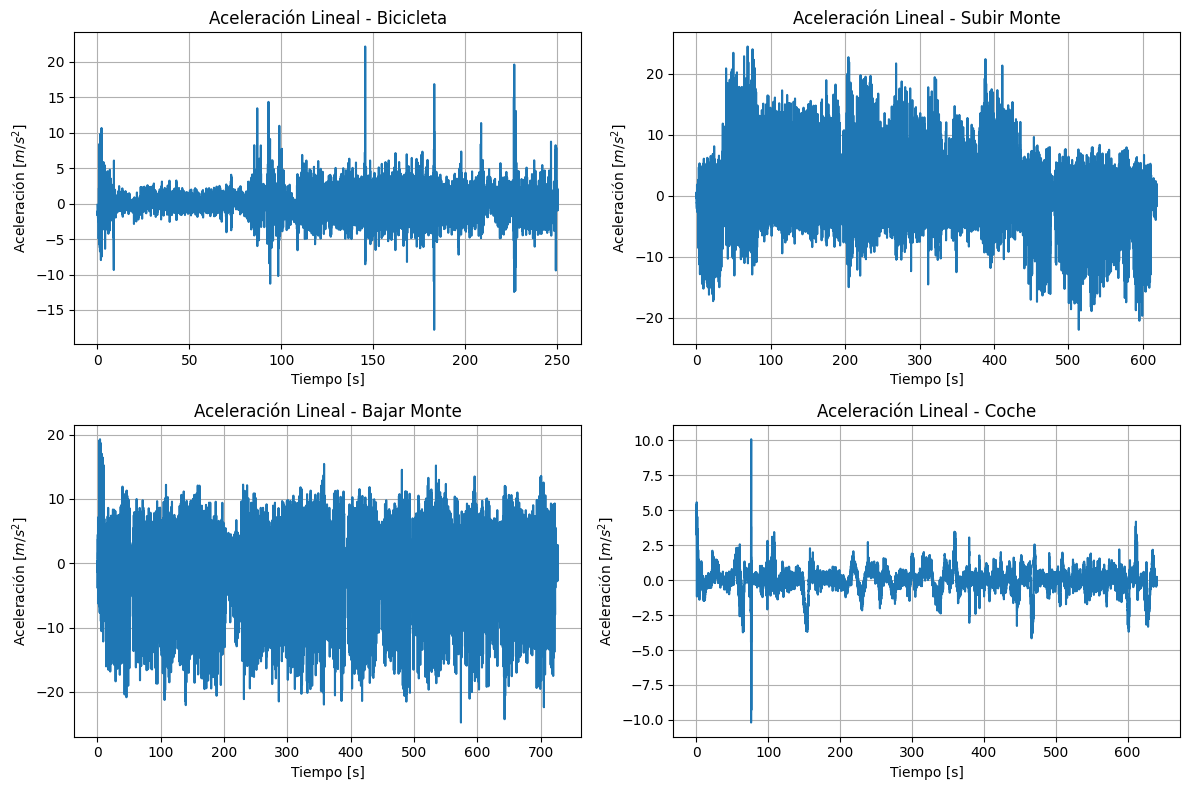

---- Dominio Frecuencial ----


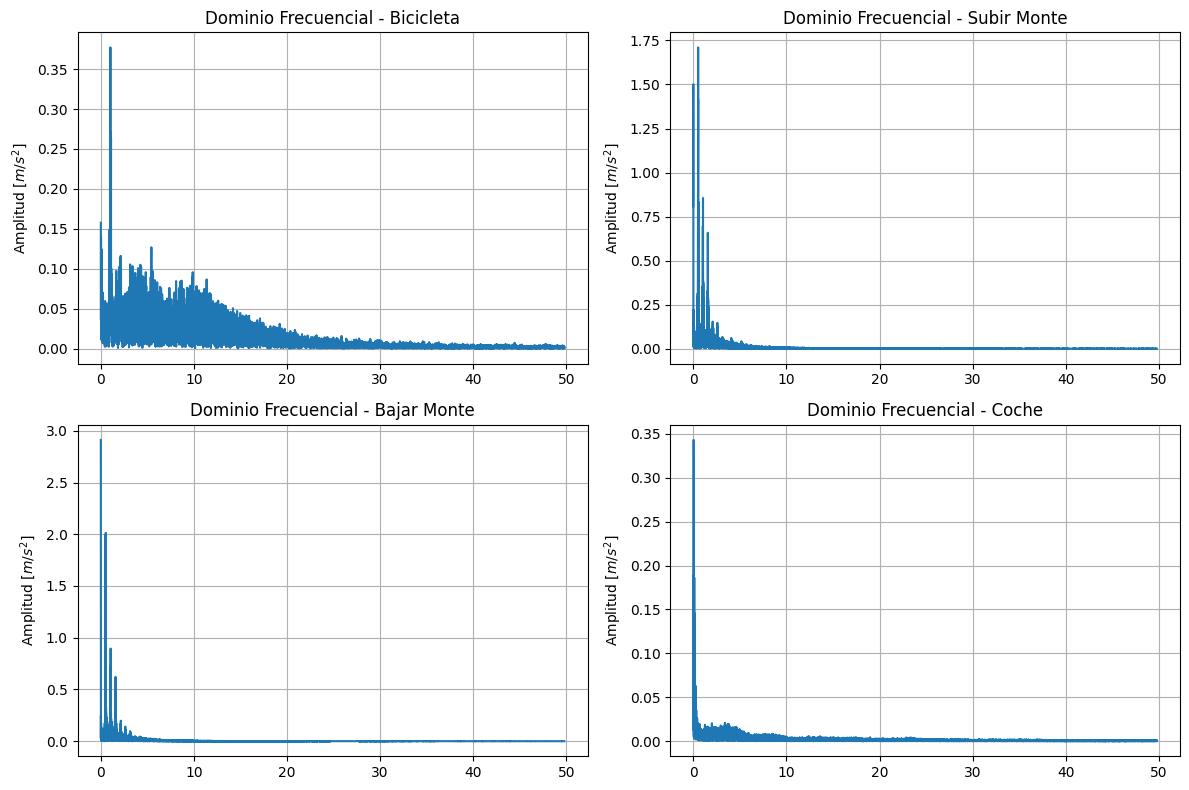

---- Ventana de Hanning ----


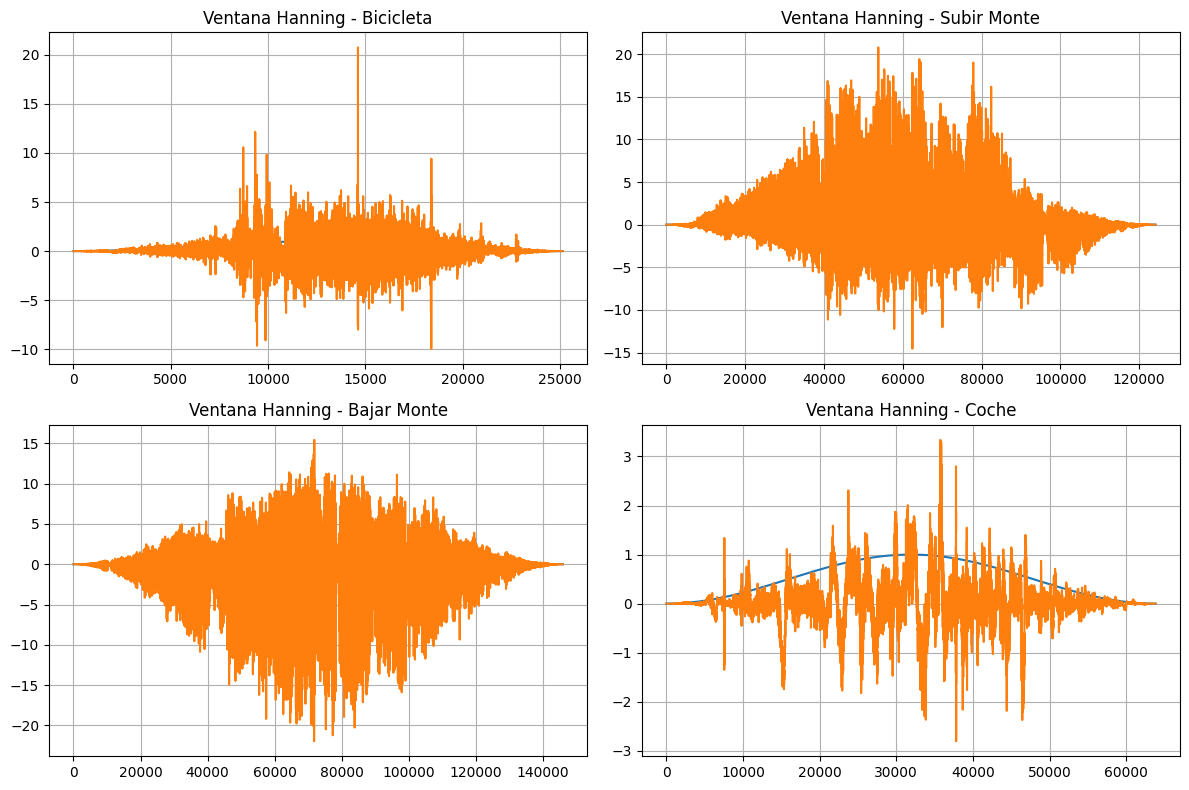

In [31]:
# Plot de la aceleración lineal
print('---- Aceleración Lineal ----')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, (data, title) in enumerate([(bici, 'Bicicleta'), (subir_monte, 'Subir Monte'), (bajar_monte, 'Bajar Monte'), (coche, 'Coche')]):
    ax = axs[i // 2, i % 2]
    ax.plot(data['Time (s)'], data['Linear Acceleration x (m/s^2)'])
    setup_graph(ax, 'Aceleración Lineal - ' + title, 'Tiempo [s]', 'Aceleración [$m/s^2$]')
plt.tight_layout()
plt.show()

# Plot en el dominio frecuencial
print('---- Dominio Frecuencial ----')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, (data, title) in enumerate([(bici, 'Bicicleta'), (subir_monte, 'Subir Monte'), (bajar_monte, 'Bajar Monte'), (coche, 'Coche')]):
    ax = axs[i // 2, i % 2]
    rfft_output = np.fft.rfft(data['Linear Acceleration x (m/s^2)'])
    rfft_mag = [np.sqrt(i.real**2 + i.imag**2) / len(rfft_output) for i in rfft_output]
    rfreqs = [(i * 1.0 / len(data)) * fs for i in range(len(data) // 2 + 1)]
    ax.plot(rfreqs, rfft_mag)
    setup_graph(ax, 'Dominio Frecuencial - ' + title)
    ax.set_ylabel('Amplitud [$m/s^2$]')
plt.tight_layout()
plt.show()

# Plot de la ventana de Hanning
print('---- Ventana de Hanning ----')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, (data, title) in enumerate([(bici, 'Bicicleta'), (subir_monte, 'Subir Monte'), (bajar_monte, 'Bajar Monte'), (coche, 'Coche')]):
    ax = axs[i // 2, i % 2]
    window = get_window("hann", len(data), fftbins=True)
    ax.plot(window)
    ax.set_ylabel('Samples')
    ax.set_xlabel('Frecuencia [Hz]')
    setup_graph(ax, 'Ventana Hanning - ' + title)
    
    # Plot de la aceleración lineal con ventana de Hanning
    ax.plot(data['Linear Acceleration x (m/s^2)'] * window)
plt.tight_layout()
plt.show()
